비지도 학습 주성분 분석도 비지도학습니다. 
중고차 시세 분석, 앱으로 만들겠다. 중고차 가격이 다다르니까 이놈들을 어떻게 다 카테고리화 시킬것인가. 
# k-means: k평균

영화 흥행 예측 , 영화 데이터를 다 때려놓고 .. 감독 ,제목 등등...

In [5]:
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8")

data<-read.csv("../Data/kmeans.csv", row.names= 'X')
head(data)

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

,식당맛집점수,식당청결점수
,<int>,<int>
강릉찌개,90,93
수원갈비,55,70
한라식당,36,20
김천국밥,46,60
양양햄버거,65,35
제주식당,85,90


### k-means
k-Means 는 표준화를 시도하여야 하나 현재 DATA는 점수이므로 표준화를 하지 않는다. 

In [37]:
k_means <-kmeans(data, centers =3, iter.max =10000)# 3분류로 하겠다. 
k_means


K-means clustering with 3 clusters of sizes 2, 2, 2

Cluster means:
  식당맛집점수 식당청결점수
1         50.5         65.0
2         87.5         91.5
3         50.5         27.5

Clustering vector:
  강릉찌개   수원갈비   한라식당   김천국밥 양양햄버거   제주식당 
         2          1          3          1          3          2 

Within cluster sum of squares by cluster:
[1]  90.5  17.0 533.0
 (between_SS / total_SS =  90.3 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [40]:
data$k_group <- k_means$cluster
head(data)

,식당맛집점수,식당청결점수,k_group
,<int>,<int>,<int>
강릉찌개,90,93,2
수원갈비,55,70,1
한라식당,36,20,3
김천국밥,46,60,1
양양햄버거,65,35,3
제주식당,85,90,2


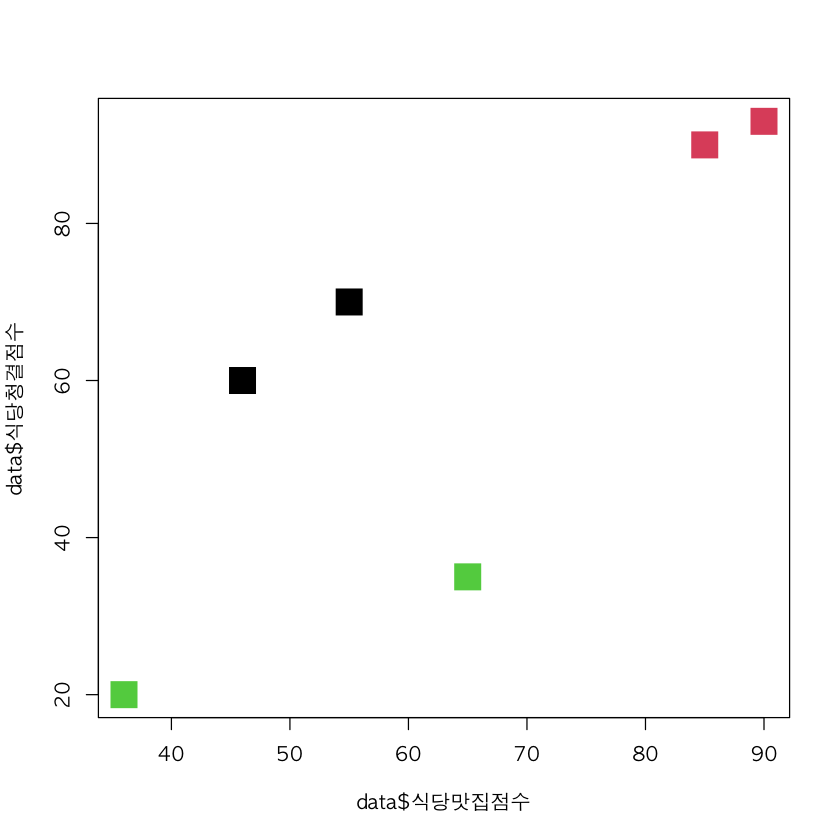

In [44]:
options(warn =-1)
par(family = 'AppleGothic', bg ='white')
plot(data$`식당맛집점수`,data$`식당청결점수`,col=data$k_group, pch =15, cex =3)

# k-means 에서 k value를 결정하는 방법

In [45]:
data.k <- data[,-3]


In [47]:
data.k

,식당맛집점수,식당청결점수
,<int>,<int>
강릉찌개,90,93
수원갈비,55,70
한라식당,36,20
김천국밥,46,60
양양햄버거,65,35
제주식당,85,90


In [49]:
install.packages('NbClust')


다운로드된 바이너리 패키지들은 다음의 위치에 있습니다
	/var/folders/j9/cyqwg1g57ts8dmlvdn5rdyhw0000gn/T//RtmptxG2ow/downloaded_packages


In [51]:
library(NbClust)

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


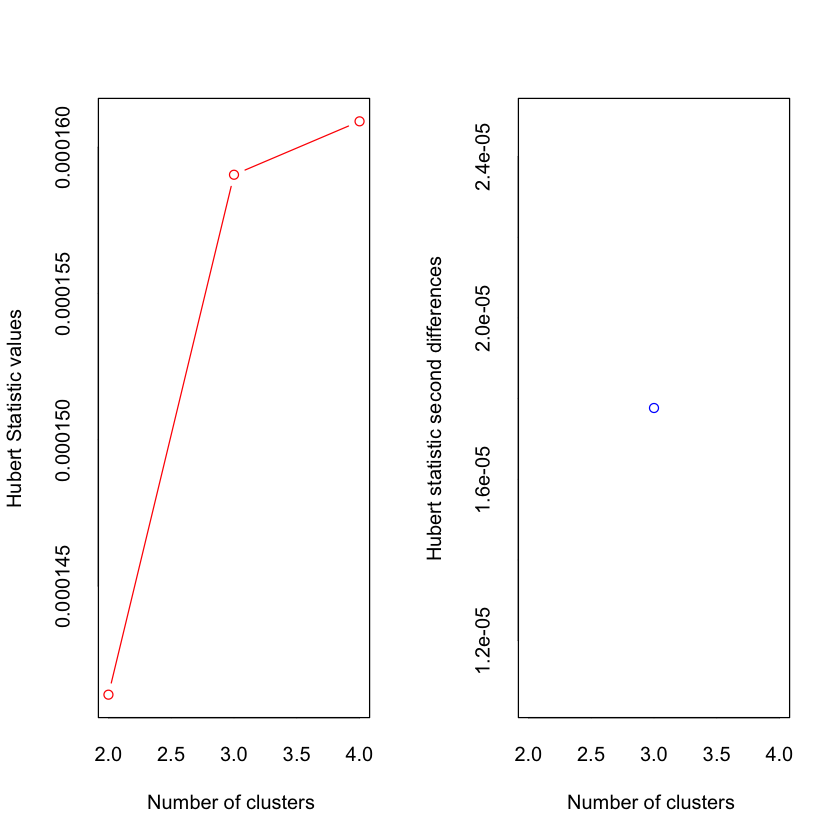

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 6 proposed 2 as the best number of clusters 
* 14 proposed 3 as the best number of clusters 
* 3 proposed 4 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 


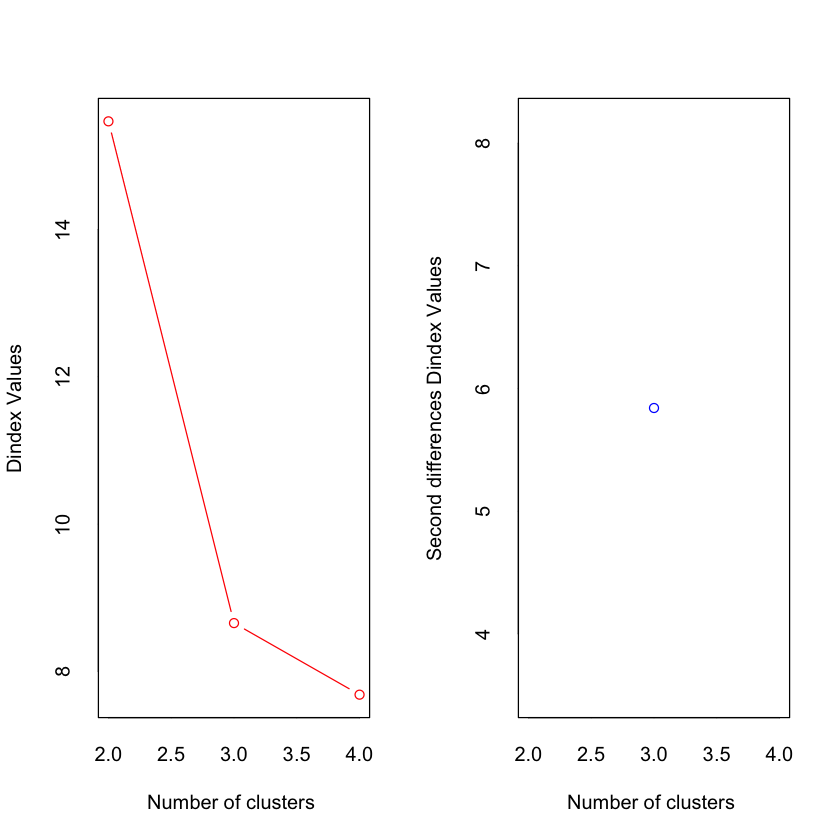

In [59]:
par(bg = 'white')
nc<-NbClust(data.k, min.nc =2, max.nc =4 ,method ='kmeans')

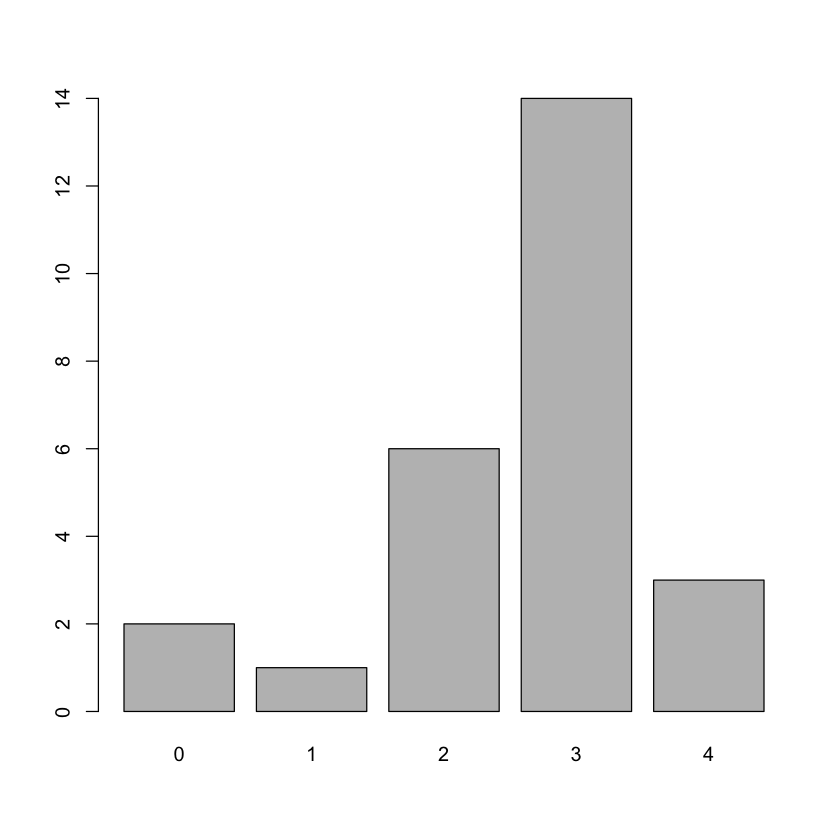

In [61]:
par(bg ="white")
barplot(table(nc$Best.nc[1,]))

# iris 로 비지도 학습( species 없이 해보자. )



*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


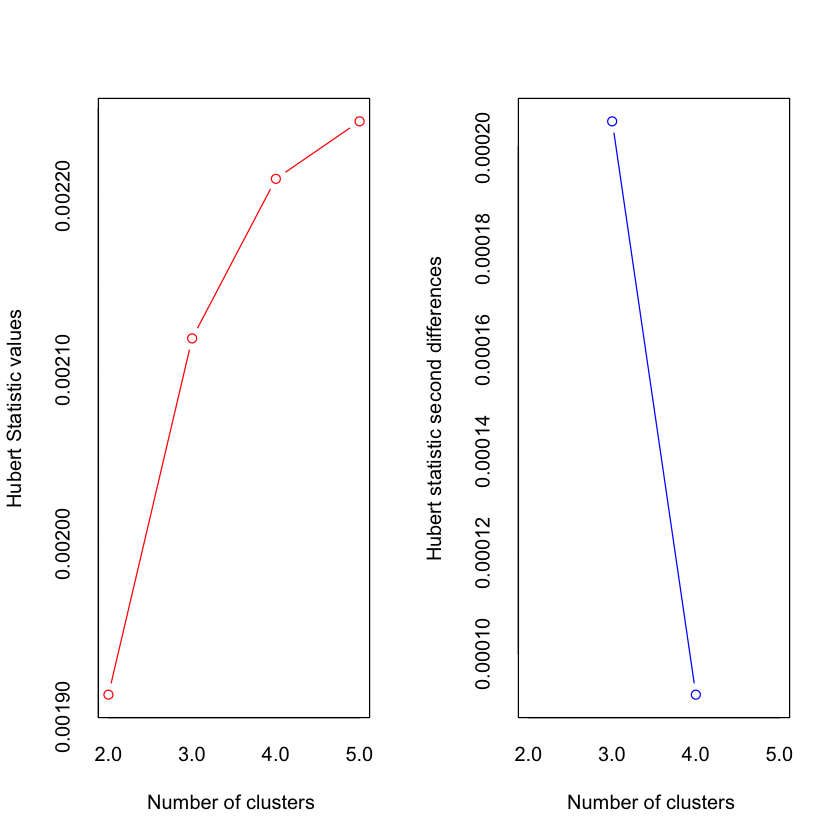

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 11 proposed 2 as the best number of clusters 
* 11 proposed 3 as the best number of clusters 
* 2 proposed 5 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
******************************************************************* 


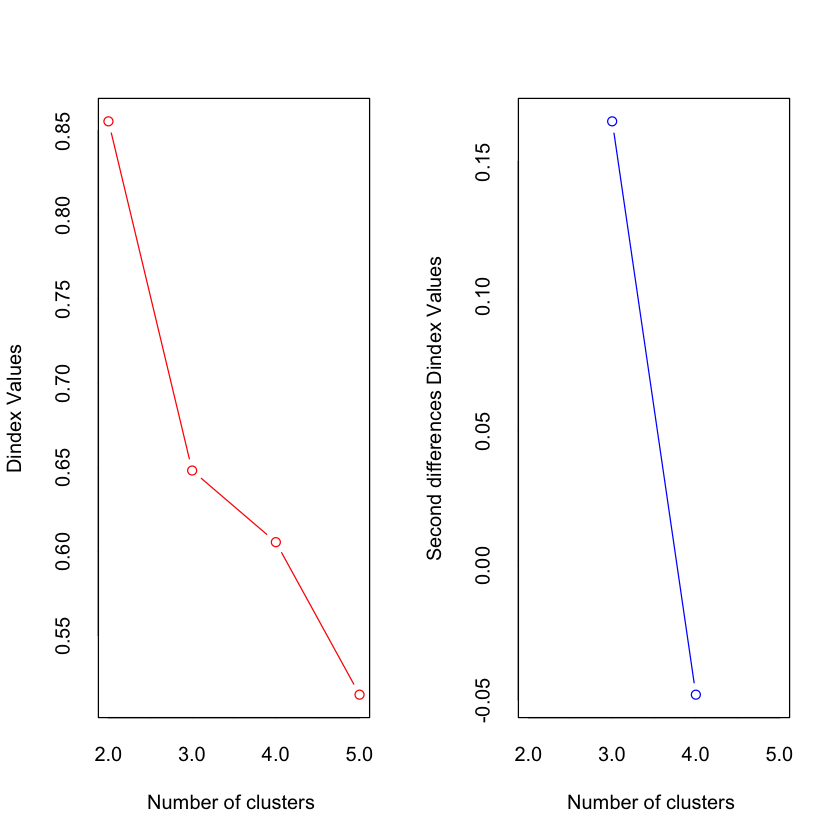

In [67]:
par(bg = 'white')

nc <- NbClust(subset(iris,select =-Species), min.nc =2, max.nc =5, method ='kmeans')

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,k_group
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,5.1,3.5,1.4,0.2,4
2,4.9,3.0,1.4,0.2,4
3,4.7,3.2,1.3,0.2,4
4,4.6,3.1,1.5,0.2,4
5,5.0,3.6,1.4,0.2,4
6,5.4,3.9,1.7,0.4,4


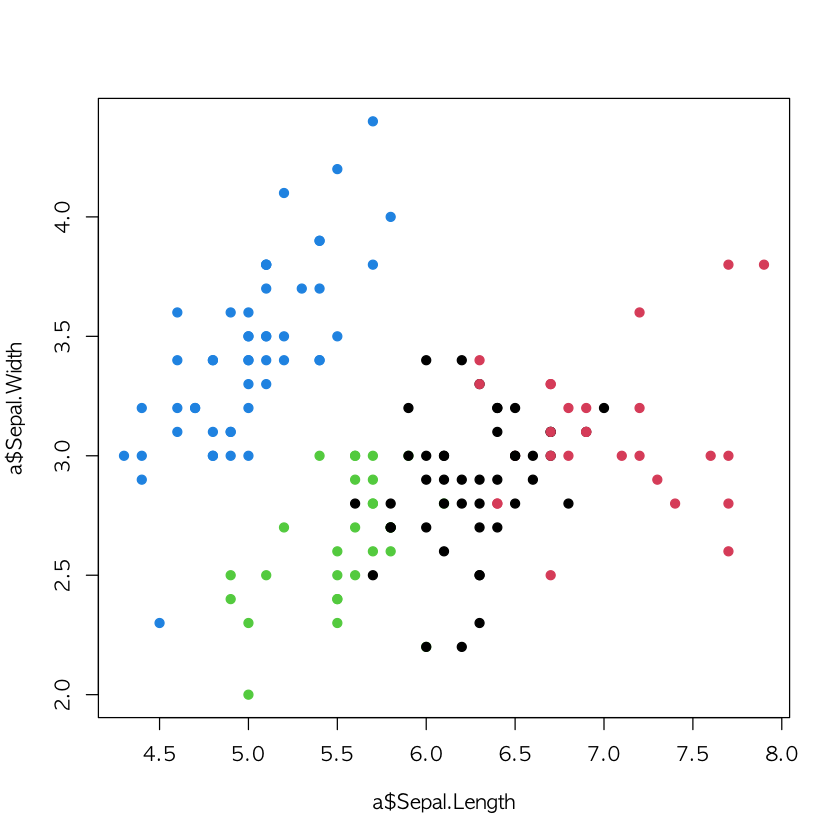

In [90]:
a<-subset(iris,select =-Species)
k_means <-kmeans(a, centers =4, iter.max =10000)# 3분류로 하겠다. 
a$k_group <- k_means$cluster
head(a)

options(warn =-1)
par(family = 'AppleGothic', bg ='white')
plot(a$Sepal.Length,a$Sepal.Width,col=a$k_group, pch =19, cex =1)